In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
 
pyo.init_notebook_mode(connected = True)

In [2]:
df_India_pop = pd.read_excel('PopVarFiles/India.xls',
                             names = ['State Code', 'District Code', 'Name', 'Year',\
                                      'Population', 'Abs_var_since_last',\
                                      'Pct_var_since_last', 'Males', 'Females'])

In [3]:
df_India_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State Code          39 non-null     object
 1   District Code       39 non-null     object
 2   Name                75 non-null     object
 3   Year                435 non-null    object
 4   Population          434 non-null    object
 5   Abs_var_since_last  436 non-null    object
 6   Pct_var_since_last  434 non-null    object
 7   Males               434 non-null    object
 8   Females             434 non-null    object
dtypes: object(9)
memory usage: 36.4+ KB


In [4]:
df_India_pop.head(10)

,State Code,District Code,Name,Year,Population,Abs_var_since_last,Pct_var_since_last,Males,Females
0,State,District,India/State/,Census,Persons,Variation since the,NaN,Males,Females
1,Code,Code,Union Territory,Year,NaN,preceding census,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,Absolute,Percentage,NaN,NaN
3,1,2,3,4,5,6,7,8,9
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,00,000,INDIA,1901 $,238396327,---,---,120791301,117358672
6,NaN,NaN,NaN,1911,252093390,"+ 13,697,063",+5.75,128385368,123708022
7,NaN,NaN,NaN,1921,251321213,"- 772,177",- 0.31,128546225,122774988
8,NaN,NaN,NaN,1931 $,278977238,"+27,656,025",+11.00,142929689,135788921
9,NaN,NaN,NaN,1941 $,318660580,"+39,683,342",+14.22,163685302,154690267


In [5]:
df_India_pop.tail(50)

,State Code,District Code,Name,Year,Population,Abs_var_since_last,Pct_var_since_last,Males,Females
466,NaN,NaN,NaN,1961,63548,"+32,577",+105.19,39304,24244
467,NaN,NaN,NaN,1971,115133,"+51,585",+81.17,70027,45106
468,NaN,NaN,NaN,1981,188741,"+73,608",+63.93,107261,81480
469,NaN,NaN,NaN,1991,280661,"+91,920",+48.70,154369,126292
470,NaN,NaN,NaN,2001,356152,"+75,491",+26.90,192972,163180
471,NaN,NaN,NaN,2011,380581,"+24,429",+6.86,202871,177710
472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474,NaN,NaN,@ In working out 'decadal variation' and...,NaN,NaN,NaN,NaN,NaN,NaN
475,NaN,NaN,of Tuensang district for 1951 (7...,NaN,NaN,NaN,NaN,NaN,NaN


There is a lot of stuff at the beiginning and end of the excel that is being inserted into the table. For tabular information, we can use the Year as our guiding feature - the actual information starts with the first 1901 entry (something like '1901 $' is present at index 5 here), and ends with last 2011 entry (index 471 here). However, we'll have to perform similar cleaning operation on all the other files - so, rather than hardcoding these index positions we should try to genralise the method so it can be applicable for all.

After finding these starting and ending index positions, we will reframe our dataframe within those positions. We'll also reset the index at the end of this section, since we may need to remove some other rows.

In [6]:
# Get index positions of fist occurence of 1901, and last occurence of 2011 in Year.
# We need to consider
# that the year can be both integer or string.
tab_start_idx = min([i for i in df_India_pop.index\
                     if ((df_India_pop.iloc[i, 3] == 1901) |\
                         ('1901' in str(df_India_pop.iloc[i, 3])))])
tab_end_idx = max([i for i in df_India_pop.index\
                   if ((df_India_pop.iloc[i, 3] == 2011) |\
                       ('2011' in str(df_India_pop.iloc[i, 3])))])
print(tab_start_idx, tab_end_idx)

df_India_pop = df_India_pop.iloc[tab_start_idx : (tab_end_idx + 1)]
df_India_pop.head()

5 471


,State Code,District Code,Name,Year,Population,Abs_var_since_last,Pct_var_since_last,Males,Females
5,00,000,INDIA,1901 $,238396327,---,---,120791301,117358672
6,NaN,NaN,NaN,1911,252093390,"+ 13,697,063",+5.75,128385368,123708022
7,NaN,NaN,NaN,1921,251321213,"- 772,177",- 0.31,128546225,122774988
8,NaN,NaN,NaN,1931 $,278977238,"+27,656,025",+11.00,142929689,135788921
9,NaN,NaN,NaN,1941 $,318660580,"+39,683,342",+14.22,163685302,154690267


In [7]:
df_India_pop.tail()

,State Code,District Code,Name,Year,Population,Abs_var_since_last,Pct_var_since_last,Males,Females
467,NaN,NaN,NaN,1971,115133,"+51,585",+81.17,70027,45106
468,NaN,NaN,NaN,1981,188741,"+73,608",+63.93,107261,81480
469,NaN,NaN,NaN,1991,280661,"+91,920",+48.70,154369,126292
470,NaN,NaN,NaN,2001,356152,"+75,491",+26.90,192972,163180
471,NaN,NaN,NaN,2011,380581,"+24,429",+6.86,202871,177710


Now let's see what else we need to clean - there are other null values we need to clean, plus the Year column itslef needs to be cleaned (after we clear the null values).

In [8]:
df_India_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 5 to 471
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State Code          36 non-null     object
 1   District Code       36 non-null     object
 2   Name                36 non-null     object
 3   Year                432 non-null    object
 4   Population          432 non-null    object
 5   Abs_var_since_last  432 non-null    object
 6   Pct_var_since_last  432 non-null    object
 7   Males               432 non-null    object
 8   Females             432 non-null    object
dtypes: object(9)
memory usage: 33.0+ KB


In [9]:
df_India_pop.isna().sum()

State Code            431
District Code         431
Name                  431
Year                   35
Population             35
Abs_var_since_last     35
Pct_var_since_last     35
Males                  35
Females                35
dtype: int64

State Code, District Code, Name - have most null values. This is due to each of them only having Information in the first year row (1901 mostly), and it's implied that the following years (1911, 1921 etc.) are for the same state/district until a new state or district is mentioned for the next 1901 entry. So, these are prime candidates for forward filling.

In [10]:
df_India_pop[['State Code', 'District Code', 'Name']] =\
        df_India_pop[['State Code', 'District Code', 'Name']].fillna(method = 'ffill')

In [11]:
print(df_India_pop.isna().sum())
df_India_pop

State Code             0
District Code          0
Name                   0
Year                  35
Population            35
Abs_var_since_last    35
Pct_var_since_last    35
Males                 35
Females               35
dtype: int64


,State Code,District Code,Name,Year,Population,Abs_var_since_last,Pct_var_since_last,Males,Females
5,00,000,INDIA,1901 $,238396327,---,---,120791301,117358672
6,00,000,INDIA,1911,252093390,"+ 13,697,063",+5.75,128385368,123708022
7,00,000,INDIA,1921,251321213,"- 772,177",- 0.31,128546225,122774988
8,00,000,INDIA,1931 $,278977238,"+27,656,025",+11.00,142929689,135788921
9,00,000,INDIA,1941 $,318660580,"+39,683,342",+14.22,163685302,154690267
...,...,...,...,...,...,...,...,...,...
467,35,000,Andaman & Nicobar Islands,1971,115133,"+51,585",+81.17,70027,45106
468,35,000,Andaman & Nicobar Islands,1981,188741,"+73,608",+63.93,107261,81480
469,35,000,Andaman & Nicobar Islands,1991,280661,"+91,920",+48.70,154369,126292
470,35,000,Andaman & Nicobar Islands,2001,356152,"+75,491",+26.90,192972,163180


In [12]:
df_India_pop[df_India_pop['Pct_var_since_last'].isna()]

,State Code,District Code,Name,Year,Population,Abs_var_since_last,Pct_var_since_last,Males,Females
17,00,000,INDIA,NaN,NaN,NaN,NaN,NaN,NaN
30,01,000,Jammu & Kashmir,NaN,NaN,NaN,NaN,NaN,NaN
43,02,000,Himachal Pradesh,NaN,NaN,NaN,NaN,NaN,NaN
56,03,000,Punjab,NaN,NaN,NaN,NaN,NaN,NaN
69,04,000,Chandigarh,NaN,NaN,NaN,NaN,NaN,NaN
82,05,000,Uttarakhand,NaN,NaN,NaN,NaN,NaN,NaN
95,06,000,Haryana,NaN,NaN,NaN,NaN,NaN,NaN
108,07,000,NCT OF Delhi,NaN,NaN,NaN,NaN,NaN,NaN
121,08,000,Rajasthan,NaN,NaN,NaN,NaN,NaN,NaN
134,09,000,Uttar Pradesh,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_India_pop[df_India_pop['Name'].isin(['INDIA', 'Jammu & Kashmir'])]

,State Code,District Code,Name,Year,Population,Abs_var_since_last,Pct_var_since_last,Males,Females
5,00,000,INDIA,1901 $,238396327,---,---,120791301,117358672
6,00,000,INDIA,1911,252093390,"+ 13,697,063",+5.75,128385368,123708022
7,00,000,INDIA,1921,251321213,"- 772,177",- 0.31,128546225,122774988
8,00,000,INDIA,1931 $,278977238,"+27,656,025",+11.00,142929689,135788921
9,00,000,INDIA,1941 $,318660580,"+39,683,342",+14.22,163685302,154690267
10,00,000,INDIA,1951 @,361088090,"+42,420,485",+13.31,185528462,175559628
11,00,000,INDIA,1961 @,439234771,"+77,682,873",+21.51,226293201,212941570
12,00,000,INDIA,1971,548159652,"+108,924,881",+24.80,284049276,264110376
13,00,000,INDIA,1981 #,683329097,"+135,169,445",+24.66,353374460,329954637
14,00,000,INDIA,1991 +,846421039,"+163,091,942",+23.87,439358440,407062599


The 35 missing values for each of the rest of the columns is simply a blank row to designate end of one section (country or state) and beginning of a new one. We don't need this.

In [14]:
df_India_pop.dropna(inplace = True)
df_India_pop.info()

df_India_pop.reset_index(drop = True, inplace = True)
df_India_pop.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 5 to 471
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State Code          432 non-null    object
 1   District Code       432 non-null    object
 2   Name                432 non-null    object
 3   Year                432 non-null    object
 4   Population          432 non-null    object
 5   Abs_var_since_last  432 non-null    object
 6   Pct_var_since_last  432 non-null    object
 7   Males               432 non-null    object
 8   Females             432 non-null    object
dtypes: object(9)
memory usage: 33.8+ KB


,State Code,District Code,Name,Year,Population,Abs_var_since_last,Pct_var_since_last,Males,Females
0,00,000,INDIA,1901 $,238396327,---,---,120791301,117358672
1,00,000,INDIA,1911,252093390,"+ 13,697,063",+5.75,128385368,123708022
2,00,000,INDIA,1921,251321213,"- 772,177",- 0.31,128546225,122774988
3,00,000,INDIA,1931 $,278977238,"+27,656,025",+11.00,142929689,135788921
4,00,000,INDIA,1941 $,318660580,"+39,683,342",+14.22,163685302,154690267


We have taken care of the null values for now. We still have some '---' values in the 1901 rows for the relative change columns (Abs_var_since_last, Pct_var_since_last) since 1901 rows do no have a last value to compare with. We'll decide on what to do with them later.

In [15]:
df_India_pop.Year.value_counts()

2011             36
1921             36
1971             36
1931             35
1991             34
2001             34
1981             34
1911             33
1961             32
1901             32
1941             32
1951             31
1910              3
1940              3
1950              3
1900              3
   1991 +         2
1960              2
   1981 #         1
1962              1
  1901 $          1
      2001 ++     1
     2001 ++      1
     1981 #       1
    1961 @        1
    1951 @        1
   1941 $         1
   1931 $         1
1948              1
Name: Year, dtype: int64

As can be seen above, we need to do some cleaning on the extra characters, before we can convert it to a suitable datatype (int).

In [16]:
def clean_year(year_frm_df: str) -> int:
    '''
        the input Year from the dataframe can be a string with or without extra characters,
        or it can be a clean int
        the output should always be cleaned integer
    '''
    cleaned_year_str = ''.join([character for character in str(year_frm_df)\
                                if character.isdigit()])
    return int(cleaned_year_str)

df_India_pop['Year'] = df_India_pop.Year.apply(clean_year)
df_India_pop.Year.value_counts()

1991    36
1981    36
1921    36
1931    36
2011    36
2001    36
1971    36
1911    33
1901    33
1961    33
1941    33
1951    32
1900     3
1910     3
1940     3
1950     3
1960     2
1962     1
1948     1
Name: Year, dtype: int64

We want to use these Year values as columns/features later, so that each district (State or Union Territories in this case, India) may have one record summarising it's growth over the years. For that, the values in Year need to be the same for a particular Census year - but that was not the case factually due to many out of ordinary situations. For instance, we have 3 records for 1950 - which were clearly for the 1951 census, but counting was performed a year earlier. On the other hand, for each census year we are supposed to have 36 records - 1951 has 32, 3 other records have 1950, and 1 more for 1948. We need to change these years to reflect the correct census years.

In [17]:
def year2censusyear(year_frm_df: int) -> int:
    '''
        the input Year from the dataframe can be any year around the census year
        (1901, 1911, ..., 2001, 2011)
        the output should be the corresponding census year
    '''
    remainder = year_frm_df % 10
    if remainder == 1:
        return year_frm_df
    else:
        quotient = year_frm_df // 10
        
        # Out of previous census year & next census year determine
        # which one is closer to year_frm_df
        if ((year_frm_df - (quotient * 10 + 1)) > (((quotient + 1) * 10 + 1) - year_frm_df)):
            return ((quotient + 1) * 10 + 1) # return next census year if that is closer
        else:
            return (quotient * 10 + 1) # return previous census year otherwise
        
        # this logic will probably not work correctly for a year that is right in the middle
        # of 2 census years, like 1956. fortunately, we don't have any such year in this
        # dataset. Also, such a case can't be genralized and we would need
        # more information to take a call.

df_India_pop['Year'] = df_India_pop.Year.apply(year2censusyear)
df_India_pop.Year.value_counts()

1901    36
1911    36
1921    36
1931    36
1941    36
1951    36
1961    36
1971    36
1981    36
1991    36
2001    36
2011    36
Name: Year, dtype: int64

In [18]:
df_India_pop['State Code'].value_counts()

00    12
01    12
20    12
21    12
22    12
23    12
24    12
25    12
26    12
27    12
28    12
29    12
30    12
31    12
32    12
33    12
34    12
19    12
18    12
17    12
08    12
02    12
03    12
04    12
05    12
06    12
07    12
09    12
16    12
10    12
11    12
12    12
13    12
14    12
15    12
35    12
Name: State Code, dtype: int64

In [19]:
df_India_pop['District Code'].value_counts()

000    432
Name: District Code, dtype: int64

In [20]:
df_India_pop['Name'].value_counts()

INDIA                        12
Jammu & Kashmir              12
Jharkhand                    12
Odisha                       12
Chhattisgarh                 12
Madhya Pradesh   $$          12
Gujarat                      12
Daman & Diu                  12
Dadra & Nagar Haveli         12
Maharashtra  ##              12
Andhra Pradesh @@            12
Karnataka                    12
Goa                          12
Lakshadweep                  12
Kerala                       12
Tamil Nadu                   12
Puducherry                   12
West Bengal                  12
Assam                        12
Meghalaya                    12
Rajasthan                    12
Himachal Pradesh             12
Punjab                       12
Chandigarh                   12
Uttarakhand                  12
Haryana                      12
NCT OF Delhi                 12
Uttar Pradesh                12
Tripura                      12
Bihar                        12
Sikkim                       12
Arunacha

This requires some cleaning.

In [21]:
def clean_Names(name_frm_df: str) -> str:
    '''
        the input Name may contain some extra spaces and extra characters
        output should be cleaned of all that (including spaces between words)
        also, output should be in all upper case
    '''
    cleaned_name = ''.join([character.upper() for character in name_frm_df\
                            if character.isalpha()])
    return cleaned_name

df_India_pop['Name'] = df_India_pop.Name.apply(clean_Names)
df_India_pop.Name.value_counts()

INDIA                    12
JAMMUKASHMIR             12
JHARKHAND                12
ODISHA                   12
CHHATTISGARH             12
MADHYAPRADESH            12
GUJARAT                  12
DAMANDIU                 12
DADRANAGARHAVELI         12
MAHARASHTRA              12
ANDHRAPRADESH            12
KARNATAKA                12
GOA                      12
LAKSHADWEEP              12
KERALA                   12
TAMILNADU                12
PUDUCHERRY               12
WESTBENGAL               12
ASSAM                    12
MEGHALAYA                12
RAJASTHAN                12
HIMACHALPRADESH          12
PUNJAB                   12
CHANDIGARH               12
UTTARAKHAND              12
HARYANA                  12
NCTOFDELHI               12
UTTARPRADESH             12
TRIPURA                  12
BIHAR                    12
SIKKIM                   12
ARUNACHALPRADESH         12
NAGALAND                 12
MANIPUR                  12
MIZORAM                  12
ANDAMANNICOBARISLAND

In [22]:
df_India_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State Code          432 non-null    object
 1   District Code       432 non-null    object
 2   Name                432 non-null    object
 3   Year                432 non-null    int64 
 4   Population          432 non-null    object
 5   Abs_var_since_last  432 non-null    object
 6   Pct_var_since_last  432 non-null    object
 7   Males               432 non-null    object
 8   Females             432 non-null    object
dtypes: int64(1), object(8)
memory usage: 30.5+ KB


In [23]:
df_India_pop['Population'].describe()

count     432
unique    427
top       N.A
freq        6
Name: Population, dtype: object

Looks like we have 6 'N.A' strings in Population.

In [24]:
df_India_pop[df_India_pop.Population.str.isnumeric() == False]

,State Code,District Code,Name,Year,Population,Abs_var_since_last,Pct_var_since_last,Males,Females
144,12,000,ARUNACHALPRADESH,1901,N.A,-,-,N.A.,N.A.
145,12,000,ARUNACHALPRADESH,1911,N.A,N.A,N.A,N.A.,N.A.
146,12,000,ARUNACHALPRADESH,1921,N.A,N.A,N.A,N.A.,N.A.
147,12,000,ARUNACHALPRADESH,1931,N.A,N.A,N.A,N.A.,N.A.
148,12,000,ARUNACHALPRADESH,1941,N.A,N.A,N.A,N.A.,N.A.
149,12,000,ARUNACHALPRADESH,1951,N.A,N.A,N.A,N.A.,N.A.


Looks like there is no census data for Arunachal till 1961, from the information at the bottom of the sheet : "Arunachal Pradesh was censused for the first time in 1961." These records don't contain any useful information, should be removed.

In [25]:
df_India_pop = df_India_pop.loc[~(df_India_pop.Population.str.isnumeric() == False)]
df_India_pop.reset_index(drop = True, inplace = True)
df_India_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State Code          426 non-null    object
 1   District Code       426 non-null    object
 2   Name                426 non-null    object
 3   Year                426 non-null    int64 
 4   Population          426 non-null    object
 5   Abs_var_since_last  426 non-null    object
 6   Pct_var_since_last  426 non-null    object
 7   Males               426 non-null    object
 8   Females             426 non-null    object
dtypes: int64(1), object(8)
memory usage: 30.1+ KB


Now that rest of the Population satisifes the Numeric condition, we should be able to convert it to a int column. Additionally, let's also convert State Code, District Code, Name into categorical data type.

In [26]:
df_India_pop = df_India_pop.astype({'Population' : int,
                                    'State Code' : 'category',
                                    'District Code' : 'category',
                                    'Name' : 'category'})
df_India_pop.dtypes

State Code            category
District Code         category
Name                  category
Year                     int64
Population               int64
Abs_var_since_last      object
Pct_var_since_last      object
Males                   object
Females                 object
dtype: object

Among the rest, Abs_var_since_last, Males, Females should be int, and Pct_var_since_last should be float. Also, the since_last columns would contain signs(+/-) as well. Let's validate what all data isn't in correct format.

In [27]:
def validate_int(int_str: str) -> bool :
    '''
        input can be str or int, need to be able to handle both.
        The ones with comma or extra space are str - those need to be cleaned before
        validating whether the remining characters form an int (signed or unsigned)
    '''
    if(type(int_str) == str):
        int_str = int_str.replace(' ', '')
        int_str = int_str.replace(',', '')
    return (re.match('[-+]?\d+$', str(int_str)) is not None)

def validate_float(float_str: str) -> bool :
    '''
        input can be str or float, need to be able to handle both.
        The ones with comma or extra space are str - those need to be cleaned before
        validating whether the remining characters form a float (signed or unsigned)
    '''
    if(type(float_str) == str):
        float_str = float_str.replace(' ', '')
        float_str = float_str.replace(',', '')
    return (re.match('[-+]?\d+\.\d+$', str(float_str)) is not None)

In [28]:
# store the validation results (for Abs_var_since_last, Males, Females,
# and Pct_var_since_last) in boolean series
val_Abs_var_since_last = df_India_pop.Abs_var_since_last.apply(validate_int)
val_Males = df_India_pop.Males.apply(validate_int)
val_Females = df_India_pop.Females.apply(validate_int)
val_Pct_var_since_last = df_India_pop.Pct_var_since_last.apply(validate_float)

# What all rows have data in any of these 4 columns that can not be converted into
# int or float?
df_India_pop[~(val_Abs_var_since_last & val_Males & val_Females & val_Pct_var_since_last)]

,State Code,District Code,Name,Year,Population,Abs_var_since_last,Pct_var_since_last,Males,Females
0,00,000,INDIA,1901,238396327,---,---,120791301,117358672
12,01,000,JAMMUKASHMIR,1901,2139362,---,---,1136766,1002596
24,02,000,HIMACHALPRADESH,1901,1920294,---,---,1019069,901225
36,03,000,PUNJAB,1901,7544790,---,---,4118386,3426404
48,04,000,CHANDIGARH,1901,21967,---,---,12402,9565
60,05,000,UTTARAKHAND,1901,1979866,---,---,1032166,947700
72,06,000,HARYANA,1901,4623064,---,---,2476390,2146674
84,07,000,NCTOFDELHI,1901,405819,---,---,217921,187898
96,08,000,RAJASTHAN,1901,10294090,---,---,5403989,4890101
108,09,000,UTTARPRADESH,1901,46647804,---,---,24066836,22580968


These all look valid - mostly missing values for 1901, which are valid since there is no last record for the first entry. Similarly, 1961 entry for Arunachal Pradesh is technically it's first entry. Puducherry's missing sex ratio is special - this is what the document mentions, "The distribution of population of Puducherry by sex for 1901 (246,354), 1931 (258,628) and 1941 (285,011) is not available. The figures of India for these years are, therefore, exclusive of these population figures so far as distribution by sex is concerned."

For now, I'm going to replace those values with null. Unfortunately, that would mean the population columns (Population, Males, Females) would be denoted as floats even though population should be int - we would use the same validation logic as above to confirm that the non-null values are int.

In [29]:
def clean_int(num_str: str) -> int:
    '''
        input can be str or int, need to be able to handle both. The ones with comma or
        extra space are str - those need to be cleaned before returning the int value
        (signed or unsigned) corresponding to the input string or null otherwise
    '''
    if(type(num_str) == str):
        num_str = num_str.replace(' ', '')
        num_str = num_str.replace(',', '')
    if (re.match('[-+]?\d+$', str(num_str)) is None):
        return np.nan
    else:
        return int(num_str)

def clean_float(num_str: str) -> float:
    '''
        input can be str or float, need to be able to handle both. The ones with comma or
        extra space are str - those need to be cleaned before returning the float value
        (signed or unsigned) corresponding to the input string or null otherwise
    '''
    if(type(num_str) == str):
        num_str = num_str.replace(' ', '')
        num_str = num_str.replace(',', '')
    if (re.match('[-+]?\d+\.\d+$', str(num_str)) is None):
        return np.nan
    else:
        return float(num_str)

In [30]:
df_India_pop['Abs_var_since_last'] = df_India_pop.Abs_var_since_last.apply(clean_int)
df_India_pop['Males'] = df_India_pop.Males.apply(clean_int)
df_India_pop['Females'] = df_India_pop.Females.apply(clean_int)
df_India_pop['Pct_var_since_last'] = df_India_pop.Pct_var_since_last.apply(clean_float)
df_India_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   State Code          426 non-null    category
 1   District Code       426 non-null    category
 2   Name                426 non-null    category
 3   Year                426 non-null    int64   
 4   Population          426 non-null    int64   
 5   Abs_var_since_last  390 non-null    float64 
 6   Pct_var_since_last  390 non-null    float64 
 7   Males               423 non-null    float64 
 8   Females             423 non-null    float64 
dtypes: category(3), float64(4), int64(2)
memory usage: 24.1 KB


In [31]:
df_India_pop.head()

,State Code,District Code,Name,Year,Population,Abs_var_since_last,Pct_var_since_last,Males,Females
0,00,000,INDIA,1901,238396327,NaN,NaN,120791301.0,117358672.0
1,00,000,INDIA,1911,252093390,13697063.0,5.75,128385368.0,123708022.0
2,00,000,INDIA,1921,251321213,-772177.0,-0.31,128546225.0,122774988.0
3,00,000,INDIA,1931,278977238,27656025.0,11.00,142929689.0,135788921.0
4,00,000,INDIA,1941,318660580,39683342.0,14.22,163685302.0,154690267.0


I want to extract Female Population Percentage as a feature. Before that, let's peform a quick validation - 

In [32]:
df_India_pop[(df_India_pop.Population != (df_India_pop.Males + df_India_pop.Females))]

,State Code,District Code,Name,Year,Population,Abs_var_since_last,Pct_var_since_last,Males,Females
0,00,000,INDIA,1901,238396327,NaN,NaN,120791301.0,117358672.0
3,00,000,INDIA,1931,278977238,27656025.0,11.00,142929689.0,135788921.0
4,00,000,INDIA,1941,318660580,39683342.0,14.22,163685302.0,154690267.0
402,34,000,PUDUCHERRY,1901,246354,NaN,NaN,NaN,NaN
405,34,000,PUDUCHERRY,1931,258628,14472.0,5.93,NaN,NaN
406,34,000,PUDUCHERRY,1941,285011,26383.0,10.20,NaN,NaN


These look valid - all related to Puducherry's missing sex information for these 3 census years. From the document again - "The figures of India for these years are, therefore, exclusive of these population figures so far as distribution by sex is concerned."

In [33]:
df_India_pop['Female_pct'] =\
                    (df_India_pop.Females * 100)/(df_India_pop.Males + df_India_pop.Females)
df_India_pop.info()
df_India_pop[(df_India_pop.Name.isin(['INDIA', 'PUDUCHERRY'])) &\
             (df_India_pop.Year.isin([1901, 1931, 1941]))]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   State Code          426 non-null    category
 1   District Code       426 non-null    category
 2   Name                426 non-null    category
 3   Year                426 non-null    int64   
 4   Population          426 non-null    int64   
 5   Abs_var_since_last  390 non-null    float64 
 6   Pct_var_since_last  390 non-null    float64 
 7   Males               423 non-null    float64 
 8   Females             423 non-null    float64 
 9   Female_pct          423 non-null    float64 
dtypes: category(3), float64(5), int64(2)
memory usage: 27.4 KB


,State Code,District Code,Name,Year,Population,Abs_var_since_last,Pct_var_since_last,Males,Females,Female_pct
0,00,000,INDIA,1901,238396327,NaN,NaN,120791301.0,117358672.0,49.279314
3,00,000,INDIA,1931,278977238,27656025.0,11.00,142929689.0,135788921.0,48.719001
4,00,000,INDIA,1941,318660580,39683342.0,14.22,163685302.0,154690267.0,48.587355
402,34,000,PUDUCHERRY,1901,246354,NaN,NaN,NaN,NaN,NaN
405,34,000,PUDUCHERRY,1931,258628,14472.0,5.93,NaN,NaN,NaN
406,34,000,PUDUCHERRY,1941,285011,26383.0,10.20,NaN,NaN,NaN


In [34]:
df_India_pop_pivot = df_India_pop.pivot_table(values = ['Pct_var_since_last', 'Female_pct'],
                                              index = ['State Code', 'District Code', 'Name'],
                                              columns =['Year'])
df_India_pop_pivot

Female_pct             \
Year                                                 1901       1911   
State Code District Code Name                                          
00         000           INDIA                  49.279314  49.072299   
01         000           JAMMUKASHMIR           46.864252  46.683257   
02         000           HIMACHALPRADESH        46.931616  47.063118   
03         000           PUNJAB                 45.414173  43.812963   
04         000           CHANDIGARH             43.542587  41.872322   
05         000           UTTARAKHAND            47.866876  47.570974   
06         000           HARYANA                46.434010  45.506946   
07         000           NCTOFDELHI             46.300937  44.215430   
08         000           RAJASTHAN              47.503966  47.592286   
09         000           UTTARPRADESH           48.407355  47.794804   
10         000           BIHAR                  51.475812  51.240448   
11         000           SIKKIM                 47.817467  48.750000   
12         000           ARUNACHALPRADESH             NaN        NaN   
13         000           NAGALAND               49.312654  49.814141   
14         000           MANIPUR                50.914172  50.706194   
15         000           MIZORAM                52.684572  52.822245   
16         000           TRIPURA                46.634934  46.945513   
17         000           MEGHALAYA              50.882757  50.329057   
18         000           ASSAM                  47.888062  47.767964   
19         000           WESTBENGAL             48.589535  48.055231   
20         000           JHARKHAND              50.793485  50.517732   
21         000           ODISHA                 50.906137  51.351676   
22         000           CHHATTISGARH           51.133598  50.961258   
23         000           MADHYAPRADESH          49.292014  49.152854   
24         000           GUJARAT                48.817988  48.612156   
25         000           DAMANDIU               49.864084  50.973206   
26         000           DADRANAGARHAVELI       48.986820  49.159201   
27         000           MAHARASHTRA            49.451787  49.136607   
28         000           ANDHRAPRADESH          49.611188  49.787312   
29         000           KARNATAKA              49.580781  49.518120   
30         000           GOA                    52.179436  52.558387   
31         000           LAKSHADWEEP            51.534361  49.673652   
32         000           KERALA                 50.104201  50.201625   
33         000           TAMILNADU              51.074747  51.025503   
34         000           PUDUCHERRY                   NaN  51.410885   
35         000           ANDAMANNICOBARISLANDS  24.155138  26.036509   

                                                                      \
Year                                                 1921       1931   
State Code District Code Name                                          
00         000           INDIA                  48.851821  48.719001   
01         000           JAMMUKASHMIR           46.534115  46.378672   
02         000           HIMACHALPRADESH        47.090664  47.290269   
03         000           PUNJAB                 44.410946  44.893748   
04         000           CHANDIGARH             42.618430  42.880251   
05         000           UTTARAKHAND            47.797998  47.736459   
06         000           HARYANA                45.769653  45.761557   
07         000           NCTOFDELHI             42.312244  41.925450   
08         000           RAJASTHAN              47.249940  47.560235   
09         000           UTTARPRADESH           47.599263  47.458838   
10         000           BIHAR                  50.497907  49.876837   
11         000           SIKKIM                 49.227249  49.161263   
12         000           ARUNACHALPRADESH             NaN        NaN   
13         000           NAGALAND               49.787470  49.936257   
14         000

For now, this is the final form of Decadal Population Variation data, now let's move on to Worker/Marginal Worker/Not Working population breakdown files. Again, here we are first dealing with the India file separately so that we can get some idea about how we can bulk load rest of the files later.

In [35]:
df_India_work = pd.read_excel('WorkFiles/India.xls',
                names = ['Table Name', 'State Code', 'District Code', 'Name', 'Area',\
                         'Age-Group', 'Pop-Persons', 'Pop-Males', 'Pop-Females',\
                         'Main-Persons', 'Main-Males', 'Main-Females', 'Marg-lt3mo-Persons',\
                         'Marg-lt3mo-Males', 'Marg-lt3mo-Females', 'Marg-3to6mo-Persons',\
                         'Marg-3to6mo-Males', 'Marg-3to6mo-Females', 'Marg-sw-Persons',\
                         'Marg-sw-Males', 'Marg-sw-Females', 'NW-Persons', 'NW-Males',\
                         'NW-Females', 'NW-sw-Persons', 'NW-sw-Males', 'NW-sw-Females'])
df_India_work

,Table Name,State Code,District Code,Name,Area,Age-Group,Pop-Persons,Pop-Males,Pop-Females,Main-Persons,...,Marg-3to6mo-Females,Marg-sw-Persons,Marg-sw-Males,Marg-sw-Females,NW-Persons,NW-Males,NW-Females,NW-sw-Persons,NW-sw-Males,NW-sw-Females
0,Table,State,District,Area,Total/,Age-Group,Population,NaN,NaN,Main workers,...,NaN,NaN,NaN,NaN,Non-workers,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Name,Code,Code,Name,Rural/,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,______________________________________________...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Urban,NaN,NaN,NaN,NaN,NaN,...,NaN,Seeking/available for work,NaN,NaN,Total,NaN,NaN,Seeking/availabe for work,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,Persons,Males,Females,Persons,...,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,B0101,35,000,State - ANDAMAN & NICOBAR ISLANDS (35),Urban,70-79,1838,1034,804,210,...,7,2,1,1,1596,824,772,24,11,13
1731,B0101,35,000,State - ANDAMAN & NICOBAR ISLANDS (35),Urban,80+,616,287,329,86,...,2,4,3,1,518,212,306,9,2,7
1732,B0101,35,000,State - ANDAMAN & NICOBAR ISLANDS (35),Urban,Age not stated,188,94,94,57,...,2,7,6,1,122,43,79,17,4,13
1733,B0101,35,000,State - ANDAMAN & NICOBAR ISLANDS (35),Urban,15-59,102306,55086,47220,51745,...,1198,2832,1933,899,46411,10566,35845,15485,4743,10742


In [36]:
# Get index positions of fist occurence of Area = Total & Age-Group = Total,
# and last occurence of Area = Urban & Age-Group = 60+.

tab_start_idx = min([i for i in df_India_work.index if\
                     ((df_India_work.iloc[i, 4] == 'Total') &\
                      (df_India_work.iloc[i, 5] == 'Total'))])
tab_end_idx = max([i for i in df_India_work.index if\
                   ((df_India_work.iloc[i, 4] == 'Urban') &\
                    (df_India_work.iloc[i, 5] == '60+'))])
print(tab_start_idx, tab_end_idx)

7 1734


In [37]:
df_India_work = df_India_work.iloc[tab_start_idx : (tab_end_idx + 1)]
df_India_work.reset_index(drop = True, inplace = True)
df_India_work

,Table Name,State Code,District Code,Name,Area,Age-Group,Pop-Persons,Pop-Males,Pop-Females,Main-Persons,...,Marg-3to6mo-Females,Marg-sw-Persons,Marg-sw-Males,Marg-sw-Females,NW-Persons,NW-Males,NW-Females,NW-sw-Persons,NW-sw-Males,NW-sw-Females
0,B0101,00,000,INDIA,Total,Total,1210854977,623270258,587584719,362565571,...,48474867,55477094,33541669,21935425,728966109,291330383,437635726,60709399,24670272,36039127
1,B0101,00,000,INDIA,Total,5-9,126928126,66300466,60627660,1108808,...,512245,328654,178149,150505,124394488,64934394,59460094,1084783,576354,508429
2,B0101,00,000,INDIA,Total,10-14,132709212,69418835,63290377,3244439,...,1358015,1263407,726515,536892,125114187,65155992,59958195,2853891,1577333,1276558
3,B0101,00,000,INDIA,Total,15-19,120526449,63982396,56544053,17703310,...,4127825,6501739,4165965,2335774,90310069,44284716,46025353,15134928,8423500,6711428
4,B0101,00,000,INDIA,Total,20-24,111424222,57584693,53839529,38664170,...,6271366,9578750,6126314,3452436,55959862,19586165,36373697,15763566,7602474,8161092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,B0101,35,000,State - ANDAMAN & NICOBAR ISLANDS (35),Urban,70-79,1838,1034,804,210,...,7,2,1,1,1596,824,772,24,11,13
1724,B0101,35,000,State - ANDAMAN & NICOBAR ISLANDS (35),Urban,80+,616,287,329,86,...,2,4,3,1,518,212,306,9,2,7
1725,B0101,35,000,State - ANDAMAN & NICOBAR ISLANDS (35),Urban,Age not stated,188,94,94,57,...,2,7,6,1,122,43,79,17,4,13
1726,B0101,35,000,State - ANDAMAN & NICOBAR ISLANDS (35),Urban,15-59,102306,55086,47220,51745,...,1198,2832,1933,899,46411,10566,35845,15485,4743,10742


Now that the table structure is somewhat less clutterred, let's take a closer look.

In [38]:
df_India_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Table Name           1728 non-null   object
 1   State Code           1728 non-null   object
 2   District Code        1728 non-null   object
 3   Name                 1728 non-null   object
 4   Area                 1728 non-null   object
 5   Age-Group            1728 non-null   object
 6   Pop-Persons          1728 non-null   object
 7   Pop-Males            1728 non-null   object
 8   Pop-Females          1728 non-null   object
 9   Main-Persons         1728 non-null   object
 10  Main-Males           1728 non-null   object
 11  Main-Females         1728 non-null   object
 12  Marg-lt3mo-Persons   1728 non-null   object
 13  Marg-lt3mo-Males     1728 non-null   object
 14  Marg-lt3mo-Females   1728 non-null   object
 15  Marg-3to6mo-Persons  1728 non-null   object
 16  Marg-3

There is quite a lot of information in this dataset, we don't need all of it. Having a more granular level breakdown is always great, but for this task we just need the Workers' (with steady income) breakdown compared to the Whole Population. To that effect, we only need data from top (excluding Table Name) to the 11th (with 0 initialization, 12th normally) column/feature - Main-Females.

Regarding the categorization of workers, https://pib.gov.in/newsite/PrintRelease.aspx?relid=71103 states :
"Work: In the previous censuses, workers were categorized as ‘Main workers’ and ‘Marginal workers’. Those who worked for more than 6 months during last year were categorized as ‘Main workers’ whereas those who worked less than 6 months were categorized as ‘Marginal Workers’. At the Census 2011, for better capturing and analysis of Census data, ‘Marginal workers have been classified into two categories viz., (i) worked for 3 months or more but less than 6 months (ii) worked for less than 3 months. The definition of ‘Main worker’ remains the same."

In [39]:
df_India_work = df_India_work.loc[:, ['State Code', 'District Code', 'Name', 'Area',\
                                   'Age-Group', 'Pop-Persons', 'Pop-Males', 'Pop-Females',\
                                   'Main-Persons', 'Main-Males', 'Main-Females']]
df_India_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State Code     1728 non-null   object
 1   District Code  1728 non-null   object
 2   Name           1728 non-null   object
 3   Area           1728 non-null   object
 4   Age-Group      1728 non-null   object
 5   Pop-Persons    1728 non-null   object
 6   Pop-Males      1728 non-null   object
 7   Pop-Females    1728 non-null   object
 8   Main-Persons   1728 non-null   object
 9   Main-Males     1728 non-null   object
 10  Main-Females   1728 non-null   object
dtypes: object(11)
memory usage: 148.6+ KB


Now let's look at individual columns.

In [40]:
df_India_work['State Code'].value_counts()

00    48
01    48
20    48
21    48
22    48
23    48
24    48
25    48
26    48
27    48
28    48
29    48
30    48
31    48
32    48
33    48
34    48
19    48
18    48
17    48
08    48
02    48
03    48
04    48
05    48
06    48
07    48
09    48
16    48
10    48
11    48
12    48
13    48
14    48
15    48
35    48
Name: State Code, dtype: int64

In [41]:
df_India_work['District Code'].value_counts()

000    1728
Name: District Code, dtype: int64

In [42]:
df_India_work['Name'].value_counts()

INDIA                                     48
State - JAMMU & KASHMIR (01)              48
State - JHARKHAND (20)                    48
State - ODISHA (21)                       48
State - CHHATTISGARH (22)                 48
State - MADHYA PRADESH (23)               48
State - GUJARAT (24)                      48
State - DAMAN & DIU (25)                  48
State - DADRA & NAGAR HAVELI (26)         48
State - MAHARASHTRA (27)                  48
State - ANDHRA PRADESH (28)               48
State - KARNATAKA (29)                    48
State - GOA (30)                          48
State - LAKSHADWEEP (31)                  48
State - KERALA (32)                       48
State - TAMIL NADU (33)                   48
State - PUDUCHERRY (34)                   48
State - WEST BENGAL (19)                  48
State - ASSAM (18)                        48
State - MEGHALAYA (17)                    48
State - RAJASTHAN (08)                    48
State - HIMACHAL PRADESH (02)             48
State - PU

The names are pretty clean - without any junk. But for our purpose we need to extract just the names, preferably matching the names in the population dataset.

In [43]:
def clean_Names_work(name_frm_work_df: str) -> str:
    '''
        the input Names in work dataframe are typically  in this format
        (with spaces, except 'INDIA'):
        <type of name (State/UT/District etc.)><hyphen(-)><NAME>
        <Statecode or district serial (not district code) in parantheses>
        we just need the name, in upper case
        output should be cleaned of the rest (including spaces between words)
    '''
    if '-' in name_frm_work_df:
        name_str = name_frm_work_df.split('-')[1]
    else:
        name_str = name_frm_work_df
    cleaned_name = ''.join([character.upper() for character in name_str\
                            if character.isalpha()])
    return cleaned_name

In [44]:
df_India_work['Name'] = df_India_work.Name.apply(clean_Names_work)
df_India_work['Name'].value_counts()

INDIA                    48
JAMMUKASHMIR             48
JHARKHAND                48
ODISHA                   48
CHHATTISGARH             48
MADHYAPRADESH            48
GUJARAT                  48
DAMANDIU                 48
DADRANAGARHAVELI         48
MAHARASHTRA              48
ANDHRAPRADESH            48
KARNATAKA                48
GOA                      48
LAKSHADWEEP              48
KERALA                   48
TAMILNADU                48
PUDUCHERRY               48
WESTBENGAL               48
ASSAM                    48
MEGHALAYA                48
RAJASTHAN                48
HIMACHALPRADESH          48
PUNJAB                   48
CHANDIGARH               48
UTTARAKHAND              48
HARYANA                  48
NCTOFDELHI               48
UTTARPRADESH             48
TRIPURA                  48
BIHAR                    48
SIKKIM                   48
ARUNACHALPRADESH         48
NAGALAND                 48
MANIPUR                  48
MIZORAM                  48
ANDAMANNICOBARISLAND

In [45]:
work_Name_set = set(df_India_work['Name'])
pop_Name_set = set(df_India_pop['Name'])
print(work_Name_set == pop_Name_set)

True


Looks like Name matches in both datasets now.

In [46]:
df_India_work['Area'].value_counts()

Total    576
Rural    576
Urban    576
Name: Area, dtype: int64

In [47]:
df_India_work['Age-Group'].value_counts()

Total             108
5-9               108
10-14             108
15-19             108
20-24             108
25-29             108
30-34             108
35-39             108
40-49             108
50-59             108
60-69             108
70-79             108
80+               108
Age not stated    108
15-59             108
60+               108
Name: Age-Group, dtype: int64

We'll reuse regex validation from the validate_int function from earlier (defined for the Decadal Population Variation file) to validate the population numbers. However, here we are assuming that the population numbers are actually being read as int and not str (with extra spaces and characters) - primarily because I don't see any of those in my basic spot checking. If the validation fails, we might require a more thorough cleaning.

In [48]:
def validate_int_work(int_str: str) -> bool :
    '''
        input can be str or int, we are assuming that they are int
        we'll validate whether the string is actually an int (signed or unsigned)
        it will return True if that is the case, False otherwise (not an int)
    '''
#     if(type(int_str) == str):
#         int_str = int_str.replace(' ', '')
#         int_str = int_str.replace(',', '')
    return (re.match('[-+]?\d+$', str(int_str)) is not None)

In [49]:
val_Pop_Persons = df_India_work['Pop-Persons'].apply(validate_int_work)
val_Pop_Males = df_India_work['Pop-Males'].apply(validate_int_work)
val_Pop_Females = df_India_work['Pop-Females'].apply(validate_int_work)
val_Main_Persons = df_India_work['Main-Persons'].apply(validate_int_work)
val_Main_Males = df_India_work['Main-Males'].apply(validate_int_work)
val_Main_Females = df_India_work['Main-Females'].apply(validate_int_work)

df_India_work[~(val_Pop_Persons & val_Pop_Males & val_Pop_Females &\
                val_Main_Persons & val_Main_Males & val_Main_Females)]


,State Code,District Code,Name,Area,Age-Group,Pop-Persons,Pop-Males,Pop-Females,Main-Persons,Main-Males,Main-Females


Looks like all 6 Population numbers are in proper int format. We'll try to convert all these columns into their intended formats.

In [50]:
df_India_work = df_India_work.astype({'State Code' : 'category',
                                      'District Code' : 'category',
                                      'Name' : 'category',
                                      'Area': 'category',
                                      'Age-Group' : 'category',
                                      'Pop-Persons' : int,
                                      'Pop-Males' : int,
                                      'Pop-Females' : int,
                                      'Main-Persons' : int,
                                      'Main-Males' : int,
                                      'Main-Females' : int})

df_India_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   State Code     1728 non-null   category
 1   District Code  1728 non-null   category
 2   Name           1728 non-null   category
 3   Area           1728 non-null   category
 4   Age-Group      1728 non-null   category
 5   Pop-Persons    1728 non-null   int64   
 6   Pop-Males      1728 non-null   int64   
 7   Pop-Females    1728 non-null   int64   
 8   Main-Persons   1728 non-null   int64   
 9   Main-Males     1728 non-null   int64   
 10  Main-Females   1728 non-null   int64   
dtypes: category(5), int64(6)
memory usage: 93.1 KB


In [51]:
df_India_work.head()

,State Code,District Code,Name,Area,Age-Group,Pop-Persons,Pop-Males,Pop-Females,Main-Persons,Main-Males,Main-Females
0,00,000,INDIA,Total,Total,1210854977,623270258,587584719,362565571,273209976,89355595
1,00,000,INDIA,Total,5-9,126928126,66300466,60627660,1108808,630875,477933
2,00,000,INDIA,Total,10-14,132709212,69418835,63290377,3244439,2033172,1211267
3,00,000,INDIA,Total,15-19,120526449,63982396,56544053,17703310,12721891,4981419
4,00,000,INDIA,Total,20-24,111424222,57584693,53839529,38664170,28977411,9686759


For this task, we are concentrating on Main Workers (who have worked more than 6 months in a year) in the age group 15-59 in both Urban & Rural areas. On that note, I need 2 new columns - Male Main Workers as a Percentage of Total Population (MaleMWpct) and same for female.

In [52]:
df_India_work[(df_India_work['Age-Group'] == '15-59') |
              ((df_India_work['Area'] == 'Total') &\
               (df_India_work['Age-Group'] == 'Total'))]

,State Code,District Code,Name,Area,Age-Group,Pop-Persons,Pop-Males,Pop-Females,Main-Persons,Main-Males,Main-Females
0,00,000,INDIA,Total,Total,1210854977,623270258,587584719,362565571,273209976,89355595
14,00,000,INDIA,Total,15-59,730072019,375474130,354597889,324425507,244427021,79998486
30,00,000,INDIA,Rural,15-59,483942812,247900542,236042270,216697315,156551166,60146149
46,00,000,INDIA,Urban,15-59,246129207,127573588,118555619,107728192,87875855,19852337
48,01,000,JAMMUKASHMIR,Total,Total,12541302,6640662,5900640,2644149,2305788,338361
...,...,...,...,...,...,...,...,...,...,...,...
1678,34,000,PUDUCHERRY,Urban,15-59,569615,279041,290574,262570,203708,58862
1680,35,000,ANDAMANNICOBARISLANDS,Total,Total,380581,202871,177710,125910,103619,22291
1694,35,000,ANDAMANNICOBARISLANDS,Total,15-59,262114,141216,120898,119219,98067,21152
1710,35,000,ANDAMANNICOBARISLANDS,Rural,15-59,159808,86130,73678,67474,56319,11155


I wanted a column (Name_TotPop) which would give us Total Population for that Name (State/UT/District etc.) - sort of like Max windows function in SQL does. Found this code snippet : https://stackoverflow.com/a/54117277

In [53]:
df_India_work['Name_TotPop'] = df_India_work.groupby('Name')['Pop-Persons'].transform('max')

df_India_work[(df_India_work['Age-Group'] == '15-59') |
              ((df_India_work['Area'] == 'Total') &\
               (df_India_work['Age-Group'] == 'Total'))]

,State Code,District Code,Name,Area,Age-Group,Pop-Persons,Pop-Males,Pop-Females,Main-Persons,Main-Males,Main-Females,Name_TotPop
0,00,000,INDIA,Total,Total,1210854977,623270258,587584719,362565571,273209976,89355595,1210854977
14,00,000,INDIA,Total,15-59,730072019,375474130,354597889,324425507,244427021,79998486,1210854977
30,00,000,INDIA,Rural,15-59,483942812,247900542,236042270,216697315,156551166,60146149,1210854977
46,00,000,INDIA,Urban,15-59,246129207,127573588,118555619,107728192,87875855,19852337,1210854977
48,01,000,JAMMUKASHMIR,Total,Total,12541302,6640662,5900640,2644149,2305788,338361,12541302
...,...,...,...,...,...,...,...,...,...,...,...,...
1678,34,000,PUDUCHERRY,Urban,15-59,569615,279041,290574,262570,203708,58862,1247953
1680,35,000,ANDAMANNICOBARISLANDS,Total,Total,380581,202871,177710,125910,103619,22291,380581
1694,35,000,ANDAMANNICOBARISLANDS,Total,15-59,262114,141216,120898,119219,98067,21152,380581
1710,35,000,ANDAMANNICOBARISLANDS,Rural,15-59,159808,86130,73678,67474,56319,11155,380581


We only need Rural & Urban breakdown of 15-59 Age-Group for every Name, and we are only going to use Male Main Workers as a Percentage of Total Population (MaleMWpct) & Female Main Workers as a Percentage of Total Population (FemaleMWpct).

In [54]:
df_India_work = df_India_work.loc[(df_India_work['Age-Group'] == '15-59') &
                                  (df_India_work['Area'].isin(['Rural', 'Urban']))]
df_India_work

,State Code,District Code,Name,Area,Age-Group,Pop-Persons,Pop-Males,Pop-Females,Main-Persons,Main-Males,Main-Females,Name_TotPop
30,00,000,INDIA,Rural,15-59,483942812,247900542,236042270,216697315,156551166,60146149,1210854977
46,00,000,INDIA,Urban,15-59,246129207,127573588,118555619,107728192,87875855,19852337,1210854977
78,01,000,JAMMUKASHMIR,Rural,15-59,5123667,2663733,2459934,1514800,1318638,196162,12541302
94,01,000,JAMMUKASHMIR,Urban,15-59,2239150,1229428,1009722,909139,794673,114466,12541302
126,02,000,HIMACHALPRADESH,Rural,15-59,3898617,1942331,1956286,1641393,1127446,513947,6864602
...,...,...,...,...,...,...,...,...,...,...,...,...
1630,33,000,TAMILNADU,Urban,15-59,23473927,11692298,11781629,11553151,8613286,2939865,72147030
1662,34,000,PUDUCHERRY,Rural,15-59,258409,127525,130884,113464,84515,28949,1247953
1678,34,000,PUDUCHERRY,Urban,15-59,569615,279041,290574,262570,203708,58862,1247953
1710,35,000,ANDAMANNICOBARISLANDS,Rural,15-59,159808,86130,73678,67474,56319,11155,380581


In [55]:
df_India_work['MaleMWpct'] = (df_India_work['Main-Males'] * 100) / df_India_work['Name_TotPop']
df_India_work['FemaleMWpct'] = (df_India_work['Main-Females'] * 100) / df_India_work['Name_TotPop']

df_India_work

,State Code,District Code,Name,Area,Age-Group,Pop-Persons,Pop-Males,Pop-Females,Main-Persons,Main-Males,Main-Females,Name_TotPop,MaleMWpct,FemaleMWpct
30,00,000,INDIA,Rural,15-59,483942812,247900542,236042270,216697315,156551166,60146149,1210854977,12.928977,4.967246
46,00,000,INDIA,Urban,15-59,246129207,127573588,118555619,107728192,87875855,19852337,1210854977,7.257339,1.639531
78,01,000,JAMMUKASHMIR,Rural,15-59,5123667,2663733,2459934,1514800,1318638,196162,12541302,10.514363,1.564128
94,01,000,JAMMUKASHMIR,Urban,15-59,2239150,1229428,1009722,909139,794673,114466,12541302,6.336447,0.912712
126,02,000,HIMACHALPRADESH,Rural,15-59,3898617,1942331,1956286,1641393,1127446,513947,6864602,16.424055,7.486916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,33,000,TAMILNADU,Urban,15-59,23473927,11692298,11781629,11553151,8613286,2939865,72147030,11.938518,4.074825
1662,34,000,PUDUCHERRY,Rural,15-59,258409,127525,130884,113464,84515,28949,1247953,6.772290,2.319719
1678,34,000,PUDUCHERRY,Urban,15-59,569615,279041,290574,262570,203708,58862,1247953,16.323371,4.716684
1710,35,000,ANDAMANNICOBARISLANDS,Rural,15-59,159808,86130,73678,67474,56319,11155,380581,14.798164,2.931045


For the Decadal Population Variation dataset, we only used Female percentage - since Male and Female exclusively constituted the whole Population in each record, as such female population share being x% guaranteed the male population share to be (100 - x)%. However, for the current Work dataset, we are using both Male and Female Main Worker percentage (of the whole population of the country/state/district etc.) - since there are other groups (Marginal Workers and Non-Workers) and other age groups (outside 15-59 group) in the population that we are not looking at.

In [56]:
df_India_work = df_India_work[['State Code', 'District Code', 'Name', 'Area',\
                               'MaleMWpct', 'FemaleMWpct']]
df_India_work.reset_index(drop = True, inplace = True)
df_India_work

,State Code,District Code,Name,Area,MaleMWpct,FemaleMWpct
0,00,000,INDIA,Rural,12.928977,4.967246
1,00,000,INDIA,Urban,7.257339,1.639531
2,01,000,JAMMUKASHMIR,Rural,10.514363,1.564128
3,01,000,JAMMUKASHMIR,Urban,6.336447,0.912712
4,02,000,HIMACHALPRADESH,Rural,16.424055,7.486916
...,...,...,...,...,...,...
67,33,000,TAMILNADU,Urban,11.938518,4.074825
68,34,000,PUDUCHERRY,Rural,6.772290,2.319719
69,34,000,PUDUCHERRY,Urban,16.323371,4.716684
70,35,000,ANDAMANNICOBARISLANDS,Rural,14.798164,2.931045


In [57]:
df_India_work_pivot = df_India_work.pivot_table(
                                            values = ['MaleMWpct', 'FemaleMWpct'],
                                            index = ['State Code', 'District Code', 'Name'],
                                            columns = ['Area'])

df_India_work_pivot

FemaleMWpct            \
Area                                                 Rural     Urban   
State Code District Code Name                                          
00         000           INDIA                    4.967246  1.639531   
01         000           JAMMUKASHMIR             1.564128  0.912712   
02         000           HIMACHALPRADESH          7.486916  0.685051   
03         000           PUNJAB                   2.185721  1.654296   
04         000           CHANDIGARH               0.120138  6.112464   
05         000           UTTARAKHAND              5.866071  1.151831   
06         000           HARYANA                  2.747928  1.442008   
07         000           NCTOFDELHI               0.083089  4.127350   
08         000           RAJASTHAN                6.743685  0.959634   
09         000           UTTARPRADESH             2.380967  0.644092   
10         000           BIHAR                    3.057924  0.295558   
11         000           SIKKIM                   8.200767  2.392982   
12         000           ARUNACHALPRADESH        10.120493  1.684292   
13         000           NAGALAND                11.269334  2.283243   
14         000           MANIPUR                  8.499878  2.790467   
15         000           MIZORAM                  6.941358  5.841929   
16         000           TRIPURA                  3.477678  1.281956   
17         000           MEGHALAYA                8.361115  1.925485   
18         000           ASSAM                    4.186367  0.661379   
19         000           WESTBENGAL               2.494426  1.553194   
20         000           JHARKHAND                3.590746  0.727965   
21         000           ODISHA                   3.402896  0.742287   
22         000           CHHATTISGARH             8.099554  1.432422   
23         000           MADHYAPRADESH            6.476615  1.377355   
24         000           GUJARAT                  4.098747  1.612295   
25         000           DAMANDIU                 1.269492  3.324604   
26         000           DADRANAGARHAVELI         3.768886  2.015077   
27         000           MAHARASHTRA              7.981796  2.840319   
28         000           ANDHRAPRADESH           10.110940  2.177320   
29         000           KARNATAKA                7.449105  3.047529   
30         000           GOA                      2.638109  4.830362   
31         000           LAKSHADWEEP              0.527353  1.999287   
32         000           KERALA                   3.282159  2.699806   
33         000           TAMILNADU                7.131114  4.074825   
34         000           PUDUCHERRY               2.319719  4.716684   
35         000           ANDAMANNICOBARISLANDS    2.931045  2.626773   

                                                MaleMWpct             
Area                                                Rural      Urban  
State Code District Code Name                                         
00         000           INDIA                  12.928977   7.257339  
01         000           JAMMUKASHMIR           10.514363   6.336447  
02         000           HIMACHALPRADESH        16.424055   2.632418  
03         000           PUNJAB                 13.935457   9.394079  
04         000           CHANDIGARH              0.953622  27.854659  
05         000           UTTARAKHAND            11.511604   6.891036  
06         000           HARYANA                13.137905   8.014090  
07         000           NCTOFDELHI              0.583282  25.155158  
08         000           RAJASTHAN              14.563528   5.671340  
09         000           UTTARPRADESH           11.757393   4.293053  
10         000           BIHAR                  12.294997   1.943584  
11         000           SIKKIM                 17.598763   6.482720  
12         000           ARUNACHALPRADESH       14.639954   5.387407  
13         000           NAGALAND               14.131449   6.039013  
14         000           MANIPU

This is the final form for the Work dataset. Now, we can join it with the population set.

In [58]:
df_India = df_India_pop_pivot.join(df_India_work_pivot)
df_India

Female_pct             \
Year                                                 1901       1911   
State Code District Code Name                                          
00         000           INDIA                  49.279314  49.072299   
01         000           JAMMUKASHMIR           46.864252  46.683257   
02         000           HIMACHALPRADESH        46.931616  47.063118   
03         000           PUNJAB                 45.414173  43.812963   
04         000           CHANDIGARH             43.542587  41.872322   
05         000           UTTARAKHAND            47.866876  47.570974   
06         000           HARYANA                46.434010  45.506946   
07         000           NCTOFDELHI             46.300937  44.215430   
08         000           RAJASTHAN              47.503966  47.592286   
09         000           UTTARPRADESH           48.407355  47.794804   
10         000           BIHAR                  51.475812  51.240448   
11         000           SIKKIM                 47.817467  48.750000   
12         000           ARUNACHALPRADESH             NaN        NaN   
13         000           NAGALAND               49.312654  49.814141   
14         000           MANIPUR                50.914172  50.706194   
15         000           MIZORAM                52.684572  52.822245   
16         000           TRIPURA                46.634934  46.945513   
17         000           MEGHALAYA              50.882757  50.329057   
18         000           ASSAM                  47.888062  47.767964   
19         000           WESTBENGAL             48.589535  48.055231   
20         000           JHARKHAND              50.793485  50.517732   
21         000           ODISHA                 50.906137  51.351676   
22         000           CHHATTISGARH           51.133598  50.961258   
23         000           MADHYAPRADESH          49.292014  49.152854   
24         000           GUJARAT                48.817988  48.612156   
25         000           DAMANDIU               49.864084  50.973206   
26         000           DADRANAGARHAVELI       48.986820  49.159201   
27         000           MAHARASHTRA            49.451787  49.136607   
28         000           ANDHRAPRADESH          49.611188  49.787312   
29         000           KARNATAKA              49.580781  49.518120   
30         000           GOA                    52.179436  52.558387   
31         000           LAKSHADWEEP            51.534361  49.673652   
32         000           KERALA                 50.104201  50.201625   
33         000           TAMILNADU              51.074747  51.025503   
34         000           PUDUCHERRY                   NaN  51.410885   
35         000           ANDAMANNICOBARISLANDS  24.155138  26.036509   

                                                                      \
Year                                                 1921       1931   
State Code District Code Name                                          
00         000           INDIA                  48.851821  48.719001   
01         000           JAMMUKASHMIR           46.534115  46.378672   
02         000           HIMACHALPRADESH        47.090664  47.290269   
03         000           PUNJAB                 44.410946  44.893748   
04         000           CHANDIGARH             42.618430  42.880251   
05         000           UTTARAKHAND            47.797998  47.736459   
06         000           HARYANA                45.769653  45.761557   
07         000           NCTOFDELHI             42.312244  41.925450   
08         000           RAJASTHAN              47.249940  47.560235   
09         000           UTTARPRADESH           47.599263  47.458838   
10         000           BIHAR                  50.497907  49.876837   
11         000           SIKKIM                 49.227249  49.161263   
12         000           ARUNACHALPRADESH             NaN        NaN   
13         000           NAGALAND               49.787470  49.936257   
14         000

This is what we desired - once we can achieve this with individual districts, we would be ready to process the data using ML methods. To better understand this form, let's look at records of India in Population & Work datsets prior to the pivot and in the final dataset.

In [59]:
df_India_pop[df_India_pop.Name == 'INDIA']

,State Code,District Code,Name,Year,Population,Abs_var_since_last,Pct_var_since_last,Males,Females,Female_pct
0,00,000,INDIA,1901,238396327,NaN,NaN,120791301.0,117358672.0,49.279314
1,00,000,INDIA,1911,252093390,13697063.0,5.750000,128385368.0,123708022.0,49.072299
2,00,000,INDIA,1921,251321213,-772177.0,-0.310000,128546225.0,122774988.0,48.851821
3,00,000,INDIA,1931,278977238,27656025.0,11.000000,142929689.0,135788921.0,48.719001
4,00,000,INDIA,1941,318660580,39683342.0,14.220000,163685302.0,154690267.0,48.587355
5,00,000,INDIA,1951,361088090,42420485.0,13.310000,185528462.0,175559628.0,48.619612
6,00,000,INDIA,1961,439234771,77682873.0,21.510000,226293201.0,212941570.0,48.480126
7,00,000,INDIA,1971,548159652,108924881.0,24.800000,284049276.0,264110376.0,48.181287
8,00,000,INDIA,1981,683329097,135169445.0,24.660000,353374460.0,329954637.0,48.286344
9,00,000,INDIA,1991,846421039,163091942.0,23.870000,439358440.0,407062599.0,48.092212


In [60]:
df_India_work[df_India_work.Name == 'INDIA']

,State Code,District Code,Name,Area,MaleMWpct,FemaleMWpct
0,00,000,INDIA,Rural,12.928977,4.967246
1,00,000,INDIA,Urban,7.257339,1.639531


In [61]:
df_India.xs('INDIA', level = 'Name').transpose()
# transposed for better visibility

State Code                       00
District Code                   000
                   Year            
Female_pct         1901   49.279314
                   1911   49.072299
                   1921   48.851821
                   1931   48.719001
                   1941   48.587355
                   1951   48.619612
                   1961   48.480126
                   1971   48.181287
                   1981   48.286344
                   1991   48.092212
                   2001   48.264438
                   2011   48.526432
Pct_var_since_last 1911    5.750000
                   1921   -0.310000
                   1931   11.000000
                   1941   14.220000
                   1951   13.310000
                   1961   21.510000
                   1971   24.800000
                   1981   24.660000
                   1991   23.870000
                   2001   21.540000
                   2011   17.703015
FemaleMWpct        Rural   4.967246
                   Urban   1.639531
MaleMWpct          Rural  12.928977
                   Urban   7.257339

As you can see, the final dataset retains the necessary information - but consolidates everything in one row, such that, each name (will be representing each district in India) will be considered one row.

One more thing to note - Pct_var_since_last had Null for all 1901 rows. Hence, it is not a column in the final dataset. Other than that, there are still some null values left. We can leave them here, since this particular dataset is not going to be used further - but we'll have to deal with them for the larger (all state files producing each district's data) dataset before handing it off to ML algos.

In [62]:
print(df_India.isna().sum())

                    Year 
Female_pct          1901     2
                    1911     1
                    1921     1
                    1931     2
                    1941     2
                    1951     1
                    1961     0
                    1971     0
                    1981     0
                    1991     0
                    2001     0
                    2011     0
Pct_var_since_last  1911     1
                    1921     1
                    1931     1
                    1941     1
                    1951     1
                    1961     1
                    1971     0
                    1981     0
                    1991     0
                    2001     0
                    2011     0
FemaleMWpct         Rural    0
                    Urban    0
MaleMWpct           Rural    0
                    Urban    0
dtype: int64


#### Data Exploration (little bit)

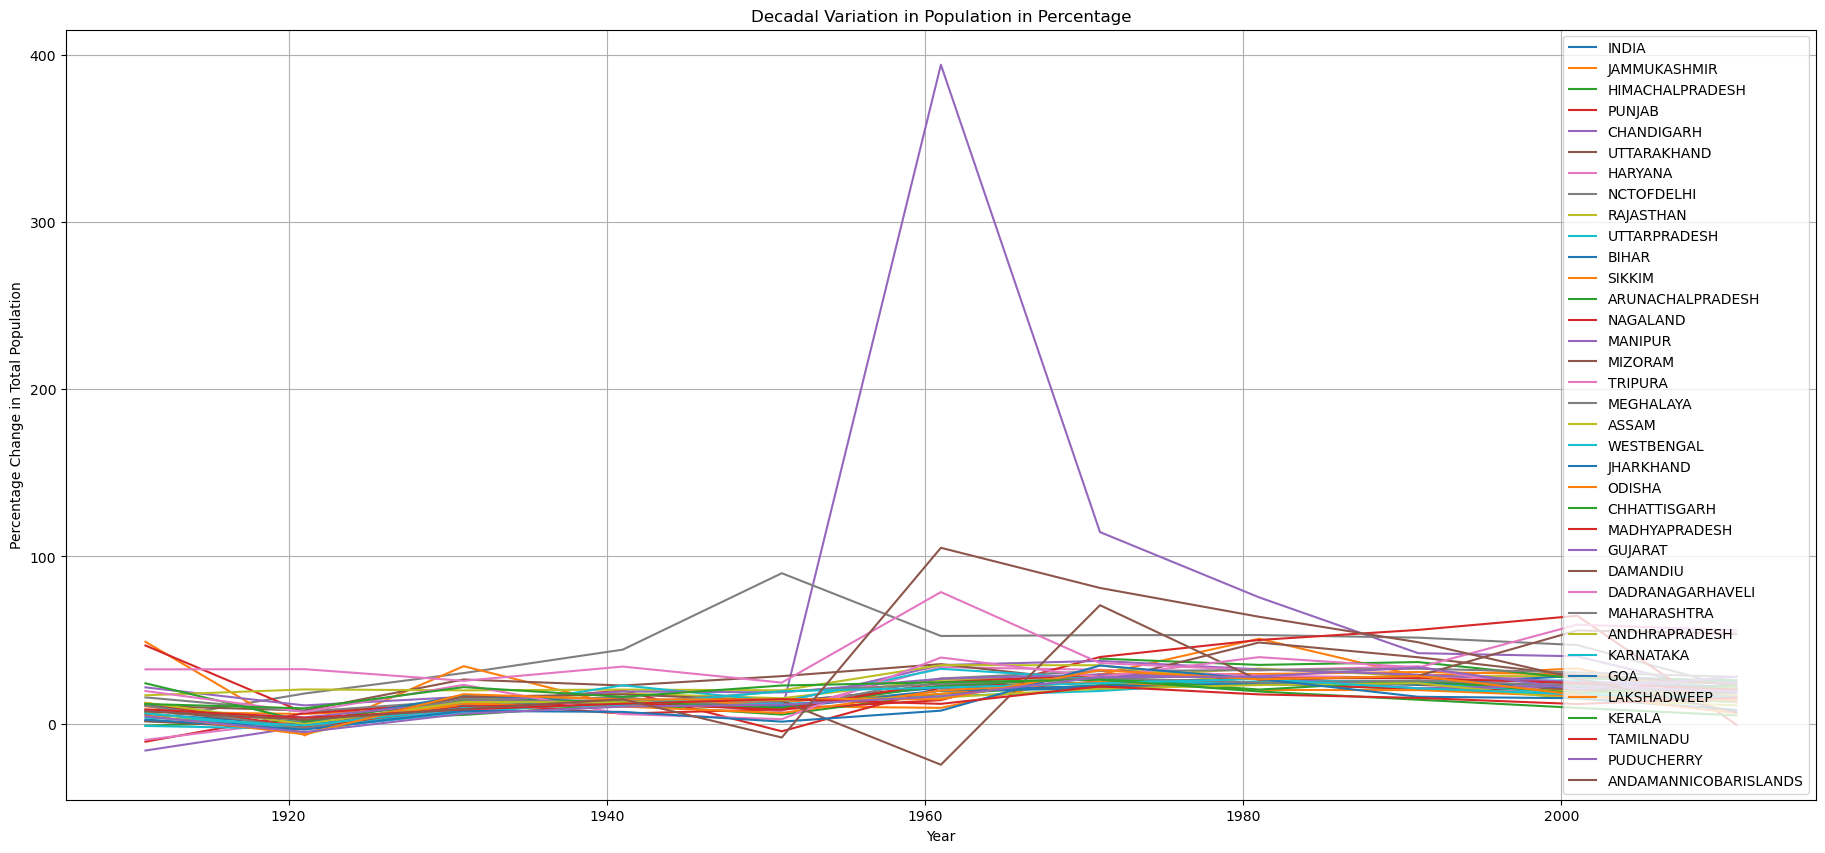

In [63]:
f, ax = plt.subplots(figsize = (20, 10), dpi = 100)
ax.set(xlabel = 'Year', ylabel = 'Percentage Change in Total Population',
      title = 'Decadal Variation in Population in Percentage')

for (state_code, district_code, name) in df_India.index:
    decadal_var = df_India.loc[(state_code, district_code, name)].Pct_var_since_last
    ax.plot(decadal_var.index, decadal_var, label = name)

f.subplots_adjust(right = 1)
ax.legend(loc = 'right')
ax.grid('on')
plt.show()

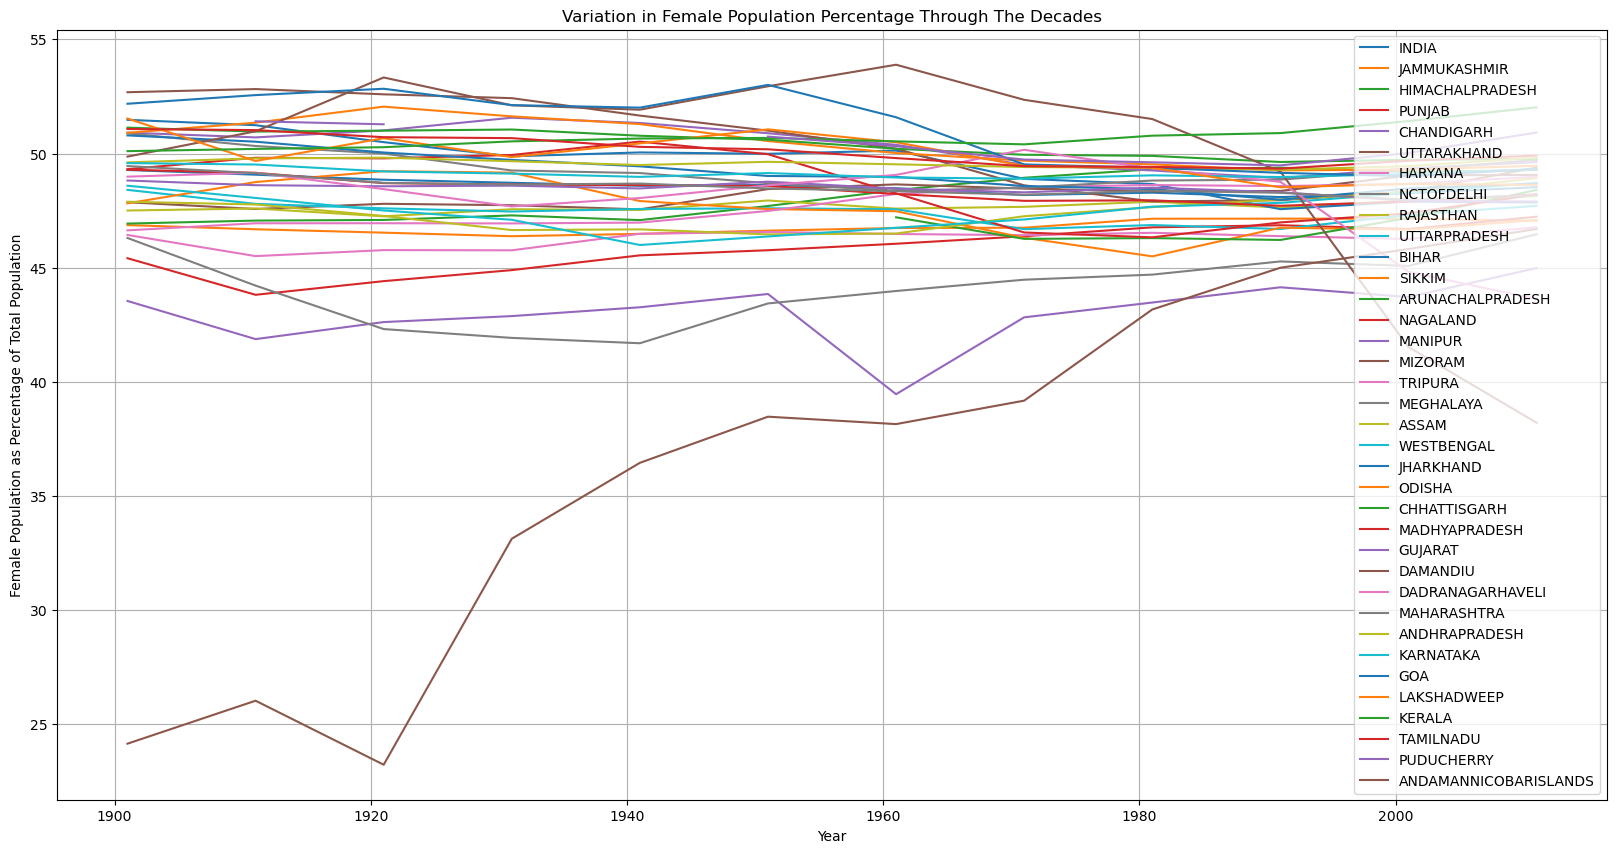

In [64]:
f, ax = plt.subplots(1, 1, figsize = (20, 10))
ax.set(xlabel = 'Year', ylabel = 'Female Population as Percentage of Total Population',
      title = 'Variation in Female Population Percentage Through The Decades')

for (state_code, district_code, name) in df_India.index:
    female_pct = df_India.loc[(state_code, district_code, name)].Female_pct
    ax.plot(female_pct.index, female_pct, label = name)

ax.grid('on')
ax.legend(loc = 'right')
plt.show()

In [65]:
fig = go.Figure()

for (state_code, district_code, name) in df_India.index:
    decadal_var = df_India.loc[(state_code, district_code, name)].Pct_var_since_last
    fig.add_trace(go.Scatter(x = decadal_var.index, y = decadal_var, name = name))

fig.update_layout(autosize = False,
                  width = 900,
                  height = 450,
                  margin = dict(l = 10, r = 25, t = 25, b = 20),
                  yaxis = dict(title_text = 'Percentage Change in Total Population'),
                  xaxis = dict(title_text = 'Year'),
                  title = dict(text = 'Decadal Variation in Population in Percentage'),
                  paper_bgcolor = 'paleturquoise')
fig.show()

In [66]:
fig = go.Figure()

for (state_code, district_code, name) in df_India.index:
    female_pct = df_India.loc[(state_code, district_code, name)].Female_pct
    fig.add_trace(go.Scatter(x = female_pct.index, y = female_pct, name = name))

fig.update_layout(autosize = False,
                  width = 900,
                  height = 450,
                  margin = dict(l = 10, r = 25, t = 25, b = 20),
                  yaxis = dict(title_text = 'Female Pop as Percentage of Total Pop'),
                  xaxis = dict(title_text = 'Year'),
                  title = dict(text =\
                            'Variation in Female Population Percentage Through The Decades'),
                  paper_bgcolor = 'burlywood')
fig.show()

For most states, both Decadal Population Variation & Decadal Female Percentage follow a similar trend and form sort of band at the center. There are some glaring exceptions though.

We're going to conclude looking at the India files here, and move on to the state files now - since that is the data we are going to use.